IMDB 데이터셋으로 LSTM 학습시키기

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 350

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))#넓게 받아서 줄여줄 수 있다. 넓게 받는건 오류가 안나는데 좁으면 오류가 난다.
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])


17465344/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
(25000,) (25000,)
350


학습 시키기

In [ ]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 28s 44ms/step - loss: 0.5980 - acc: 0.6793 - val_loss: 0.6755 - val_acc: 0.5524
Epoch 2/15
625/625 [==============================] - 27s 43ms/step - loss: 0.4997 - acc: 0.7591 - val_loss: 0.4107 - val_acc: 0.8232
Epoch 3/15
625/625 [==============================] - 27s 43ms/step - loss: 0.3211 - acc: 0.8695 - val_loss: 0.4004 - val_acc: 0.8340
Epoch 4/15
625/625 [==============================] - 27s 43ms/step - loss: 0.2343 - acc: 0.9100 - val_loss: 0.3273 - val_acc: 0.8584
Epoch 5/15
625/625 [==============================] - 27s 43ms/step - loss: 0.1876 - acc: 0.9311 - val_loss: 0.3337 - val_acc: 0.8674
Epoch 6/15
625/625 [==============================] - 27s 43ms/step - loss: 0.1803 - acc: 0.9342 - val_loss: 0.3806 - val_acc: 0.8630
Epoch 7/15
625/625 [==============================] - 27s 43ms/step - loss: 0.1427 - acc: 0.9503 - val_loss: 0.3869 - val_acc: 0.8644
Epoch 8/15
625/625 [==============================] - 27s 43ms

학습 과정 그리기

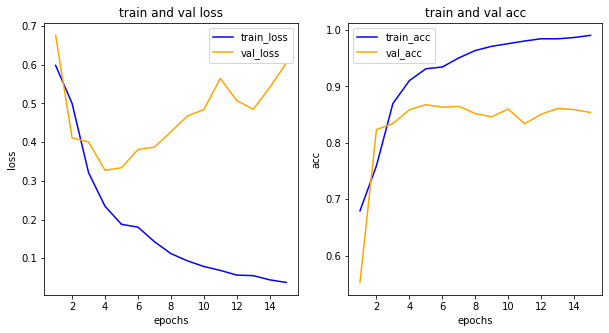

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

모델 평가하기

In [ ]:
model.evaluate(pad_X_test, y_test)

782/782 [==============================] - 14s 18ms/step - loss: 0.6779 - acc: 0.8380


[0.677906334400177, 0.8380399942398071]